# imports

In [15]:
from auxilary import *
from processing import *
from segmentation import *
from registration import *  
from processing_plus import *

# getting started!
here we will install the TrailMap axon segmentation model if nesscary and create our expirement

In [ ]:
exp_path = createExperiment("UTSW_brain5_reg_optim")
#exp_path = r"F:\axonAtlas2\experiments\UTSW_brain6_2025-10-31_13-27-47"


Ensured base experiments directory exists: 'f:\axonAtlas2\experiments'
Successfully created experiment folder: 'f:\axonAtlas2\experiments\UTSW_brain5_reg_optim_2025-11-15_17-28-23'


<tifffile.TiffPage 0 @8> imagej_metadata failed with ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()


The folder 'TRAILMAP' was found in the current directory. Proceed!


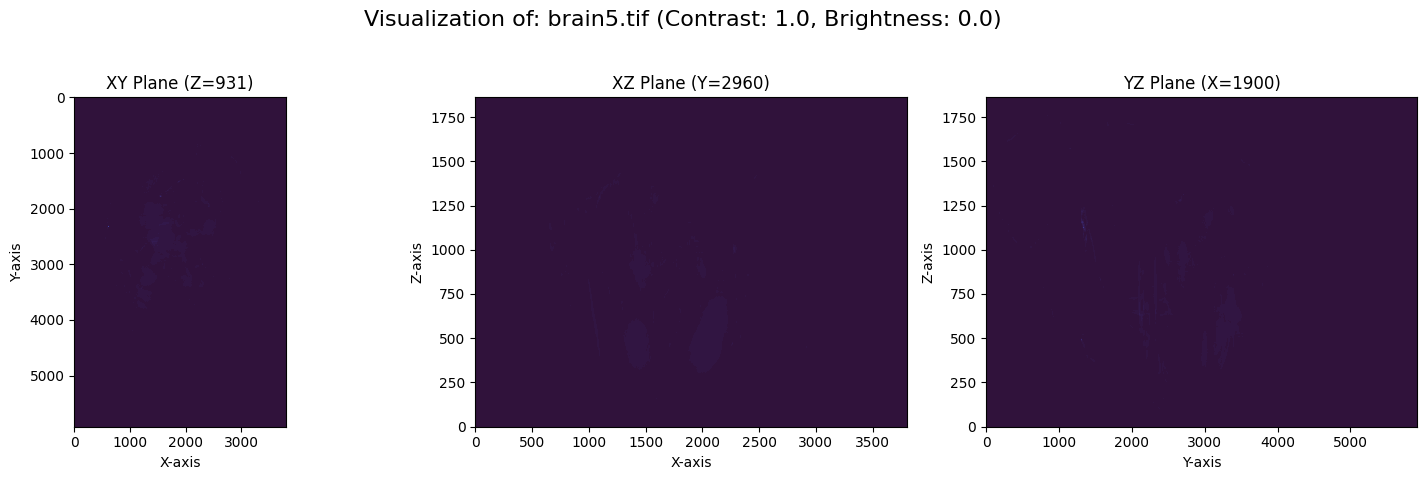

Successfully visualized 'F:\102925_smartspim\sample-5\brain5.tif'.


In [17]:
check_trailmap()
axon_stack = r"F:\102925_smartspim\sample-5\brain5.tif"
#autof_stack = r"F:\Brain 5 Lifecanvas SmartSPIM\1.6X\All_Channels\ch0_0.5xyz.tif"
tiffVisualize(axon_stack, views=3, colormap="turbo")
#cell_stack = r""



<tifffile.TiffPage 0 @8> imagej_metadata failed with ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()



[Surgical Mask] Starting for: brain5.tif
Image loaded. Shape: (1862, 5920, 3800)
Calculating threshold for initial tissue mask...
Otsu threshold value: 96
Eroding mask by 20 iterations (shaving the edges)...
Applying eroded mask to original data...
--- Normalizing and saving to: brain5_masked_eroded20.tif ---
Save complete.


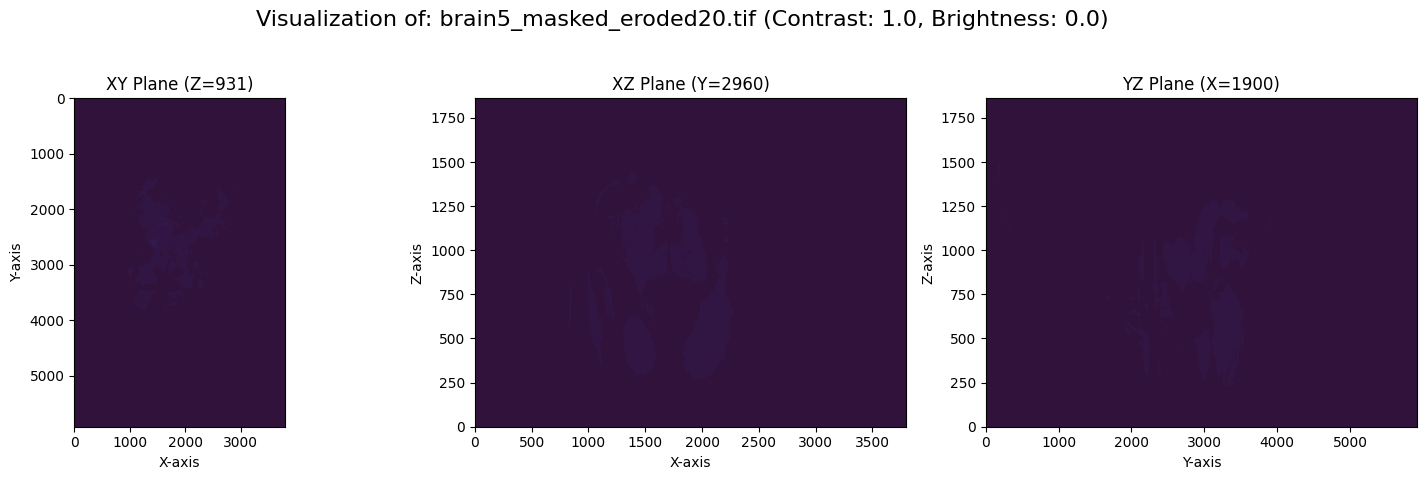

Successfully visualized 'f:\axonAtlas2\experiments\UTSW_brain5_reg_optim_2025-11-15_17-28-23\brain5_masked_eroded20.tif'.


In [18]:
surgical_mask_stack = surgical_mask(axon_stack, exp_path, erosion_iterations=20)
tiffVisualize(surgical_mask_stack, views=3, colormap="turbo")

# axon segmentation
here we will run trailmap and generate our axon segmentation masks

In [19]:
!pip install h5py==2.10.0
seg_axon_stack = axonSegment(surgical_mask_stack, exp_path)



--- Starting TRAILMAP Inference for 'brain5_masked_eroded20.tif' ---
Created temporary directory: 'f:\axonAtlas2\experiments\UTSW_brain5_reg_optim_2025-11-15_17-28-23\trailmap_inference_temp'

Converting 'brain5_masked_eroded20.tif' to frames folder...
Created output folder: 'f:\axonAtlas2\experiments\UTSW_brain5_reg_optim_2025-11-15_17-28-23\trailmap_inference_temp\brain5_masked_eroded20_folder'
Processing 1862 frames from 'f:\axonAtlas2\experiments\UTSW_brain5_reg_optim_2025-11-15_17-28-23\brain5_masked_eroded20.tif'...
Successfully saved all frames from 'f:\axonAtlas2\experiments\UTSW_brain5_reg_optim_2025-11-15_17-28-23\brain5_masked_eroded20.tif' to 'f:\axonAtlas2\experiments\UTSW_brain5_reg_optim_2025-11-15_17-28-23\trailmap_inference_temp\brain5_masked_eroded20_folder'.

Running TRAILMAP segmentation command...
Command executed: 'python TRAILMAP/segment_brain_batch.py f:/axonAtlas2/experiments/UTSW_brain5_reg_optim_2025-11-15_17-28-23/trailmap_inference_temp/brain5_masked_erode

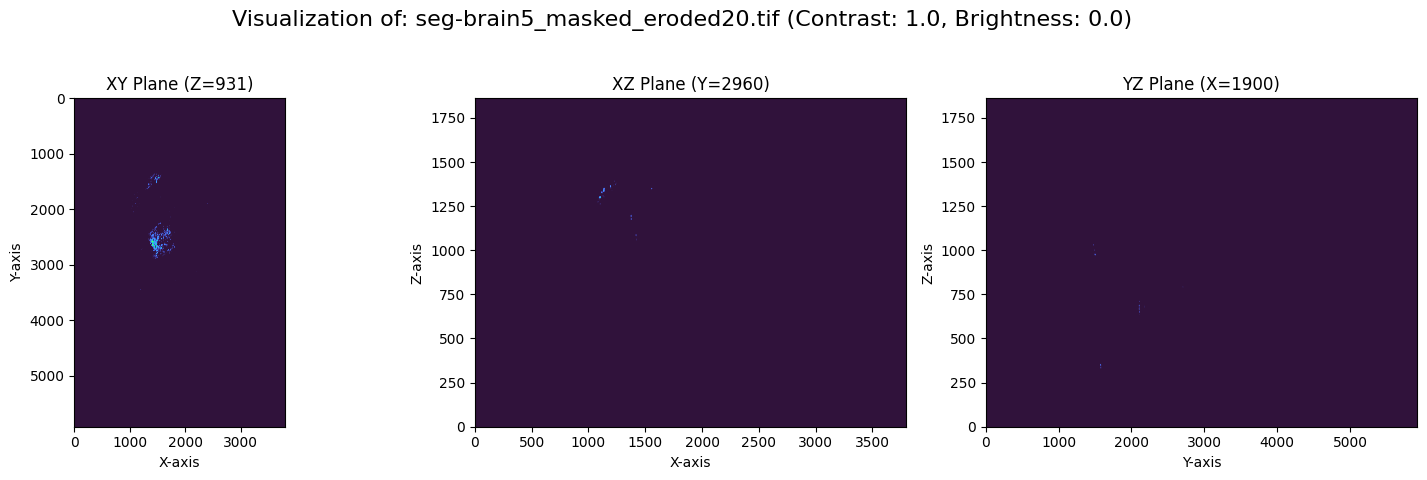

Successfully visualized 'f:\axonAtlas2\experiments\UTSW_brain5_reg_optim_2025-11-15_17-28-23\seg-brain5_masked_eroded20.tif'.


In [20]:
tiffVisualize(seg_axon_stack, views=3, colormap="turbo")

<tifffile.TiffPage 0 @8> imagej_metadata failed with ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()


Starting downscaling process for: F:\102925_smartspim\sample-5\brain5.tif
Reading input file (this may take a while for large files)...
Original shape: (1862, 5920, 3800)
Downscaling with factor: 0.5 (this may also take a while)...
New shape: (931, 2960, 1900)
Saving to: f:\axonAtlas2\experiments\UTSW_brain5_reg_optim_2025-11-15_17-28-23\brain5_dscaled_0p5.tif
Saving... 10% complete
Saving... 20% complete
Saving... 30% complete
Saving... 40% complete
Saving... 50% complete
Saving... 60% complete
Saving... 70% complete
Saving... 80% complete
Saving... 90% complete
Saving... 100% complete
Downscaling complete.
Starting downscaling process for: f:\axonAtlas2\experiments\UTSW_brain5_reg_optim_2025-11-15_17-28-23\seg-brain5_masked_eroded20.tif
Reading input file (this may take a while for large files)...
Original shape: (1862, 5920, 3800)
Downscaling with factor: 0.5 (this may also take a while)...
New shape: (931, 2960, 1900)
Saving to: f:\axonAtlas2\experiments\UTSW_brain5_reg_optim_2025-

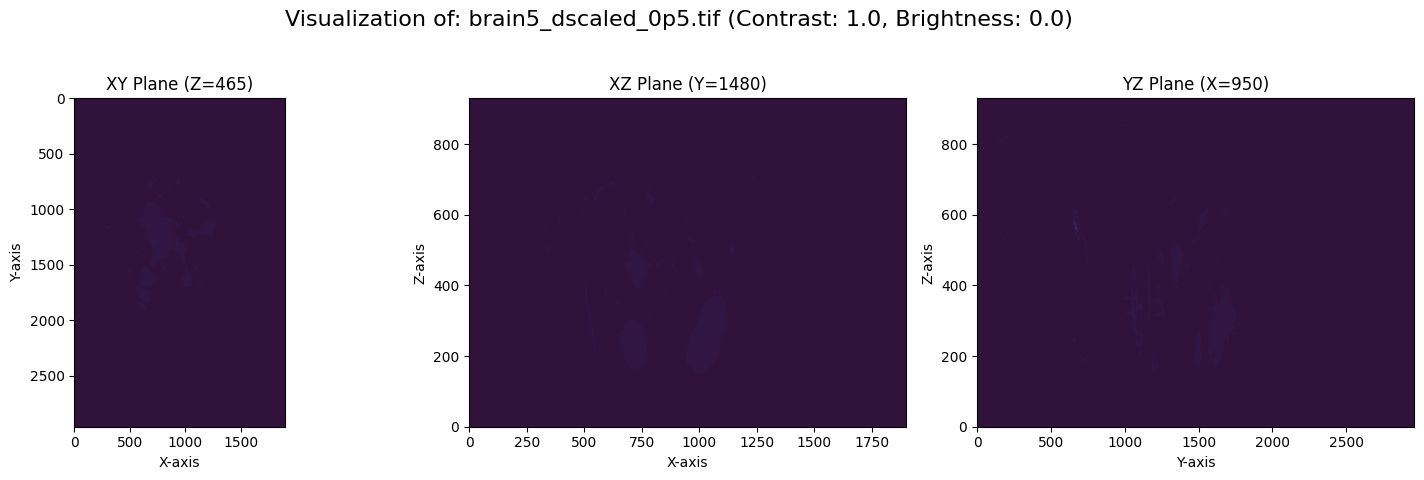

Successfully visualized 'f:\axonAtlas2\experiments\UTSW_brain5_reg_optim_2025-11-15_17-28-23\brain5_dscaled_0p5.tif'.


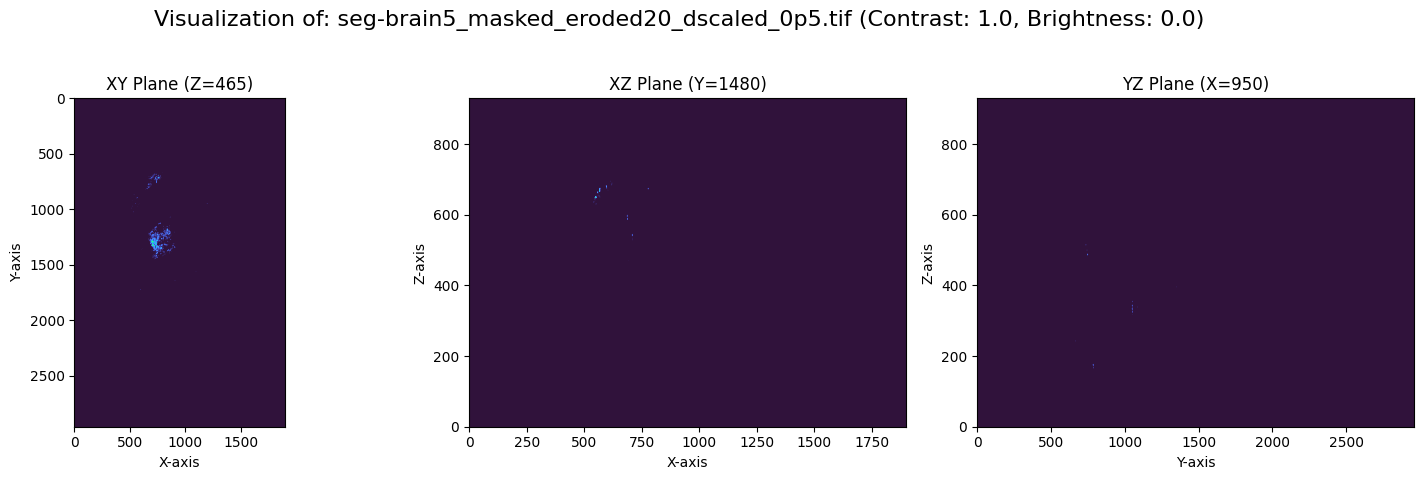

Successfully visualized 'f:\axonAtlas2\experiments\UTSW_brain5_reg_optim_2025-11-15_17-28-23\seg-brain5_masked_eroded20_dscaled_0p5.tif'.


In [21]:
d_scaled_axon_stack = downscale(axon_stack, scale_factor=0.5, output_dir=exp_path)
d_scaled_seg_stack = downscale(seg_axon_stack, scale_factor=0.5, output_dir=exp_path)
tiffVisualize(d_scaled_axon_stack, views=3, colormap="turbo")
tiffVisualize(d_scaled_seg_stack, views=3, colormap="turbo")

# composition
here we binarize our segmentation masks and compose them with the raw axonal data to prepare for registration|

Binarizing 931 frames from 'f:\axonAtlas2\experiments\UTSW_brain5_reg_optim_2025-11-15_17-28-23\seg-brain5_masked_eroded20_dscaled_0p5.tif'...
  Processed 100/931 frames...
  Processed 200/931 frames...
  Processed 300/931 frames...
  Processed 400/931 frames...
  Processed 500/931 frames...
  Processed 600/931 frames...
  Processed 700/931 frames...
  Processed 800/931 frames...
  Processed 900/931 frames...
  Processed 931/931 frames...
Successfully created binarized TIFF stack: 'f:\axonAtlas2\experiments\UTSW_brain5_reg_optim_2025-11-15_17-28-23\seg-brain5_masked_eroded20_dscaled_0p5_binary.tif'.


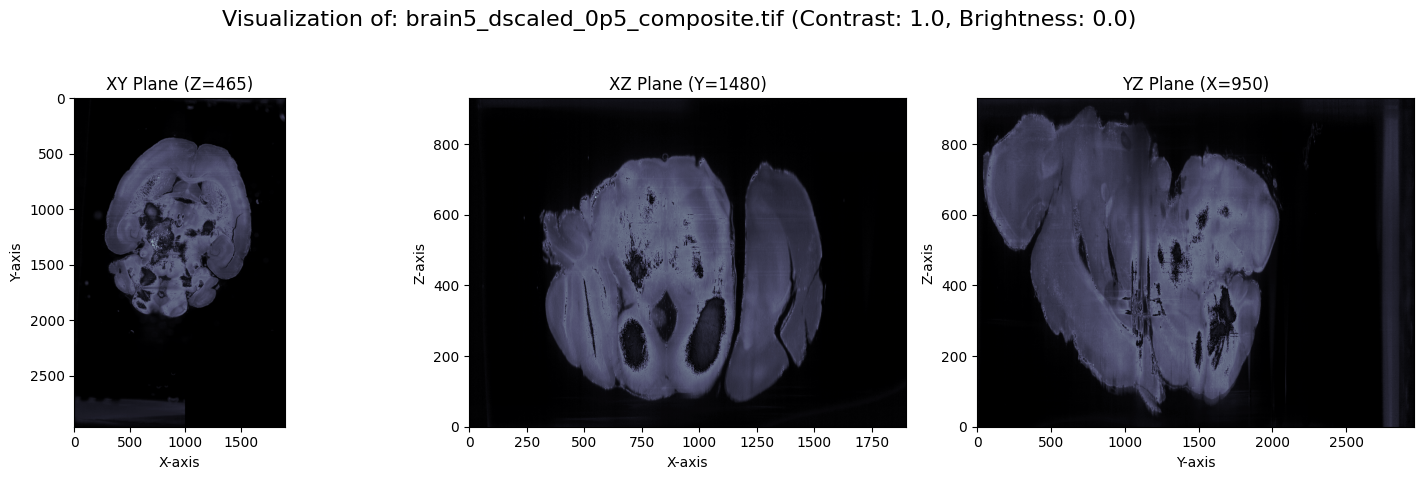

Successfully visualized 'f:\axonAtlas2\experiments\UTSW_brain5_reg_optim_2025-11-15_17-28-23\brain5_dscaled_0p5_composite.tif'.


In [22]:
binary = binarize(d_scaled_seg_stack, exp_path)
axon_proc = dimCompose(binary, d_scaled_axon_stack, exp_path, dim_factor = 0.5)
tiffVisualize(axon_proc, views=3, colormap="bone")

# registration
here we register our autoflourescence and composed data to the allen mouse brain atlas

In [23]:
reg_path = Registration(autof_path=axon_proc, v1=10, v2=10, v3=10, orientation="sal", output_dir=exp_path, atlas="allen_mouse_25um")
#reg_path = r"D:\axonAtlas2\experiments\alpha_2025-09-08_14-35-31\registration"

Constructed brainreg command: brainreg "f:/axonAtlas2/experiments/UTSW_brain5_reg_optim_2025-11-15_17-28-23/brain5_dscaled_0p5_composite.tif" "f:/axonAtlas2/experiments/UTSW_brain5_reg_optim_2025-11-15_17-28-23/registration" --atlas allen_mouse_25um -v 10 10 10 --orientation sal --n-free-cpus 8 --brain_geometry full --pre-processing default
Brainreg command executed successfully.


['f:\\axonAtlas2\\experiments\\UTSW_brain5_reg_optim_2025-11-15_17-28-23\\registration\\downsampled.tiff', 'f:\\axonAtlas2\\experiments\\UTSW_brain5_reg_optim_2025-11-15_17-28-23\\registration\\registered_atlas.tiff', None, 'f:\\axonAtlas2\\experiments\\UTSW_brain5_reg_optim_2025-11-15_17-28-23\\registration\\downsampled_standard.tiff', None]


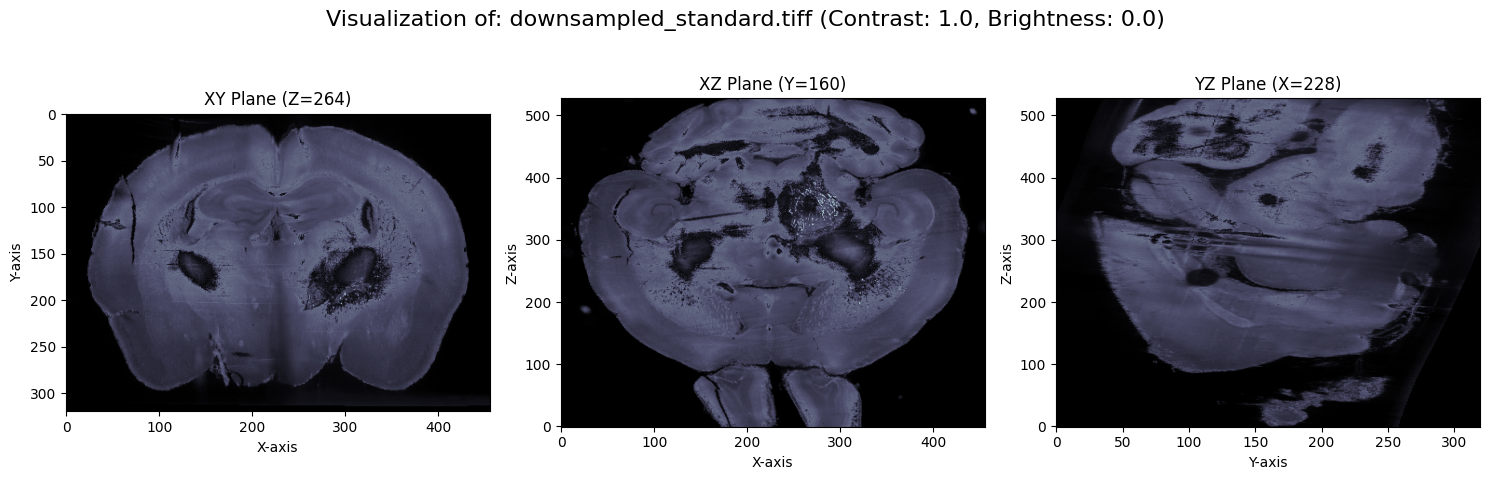

Successfully visualized 'f:\axonAtlas2\experiments\UTSW_brain5_reg_optim_2025-11-15_17-28-23\registration\downsampled_standard.tiff'.


In [24]:
reg_list = regExtract(reg_path)
print(reg_list)
downsampled_standard_autof = reg_list[3]
tiffVisualize(downsampled_standard_autof, views=3, colormap="bone")

# postprocessing
here we use thresholding to extract the exon segmentation masks in the atlas space

Loading TIFF stack from: f:\axonAtlas2\experiments\UTSW_brain5_reg_optim_2025-11-15_17-28-23\registration\downsampled_standard.tiff
Saving 10 binned sub-tiffs to: f:\axonAtlas2\experiments\UTSW_brain5_reg_optim_2025-11-15_17-28-23\downsampled_standard_binned_tiffs
  - Saved bin 0 to bin_0_0.0-25.5.tif
  - Saved bin 1 to bin_1_25.5-51.0.tif
  - Saved bin 2 to bin_2_51.0-76.5.tif
  - Saved bin 3 to bin_3_76.5-102.0.tif
  - Saved bin 4 to bin_4_102.0-127.5.tif
  - Saved bin 5 to bin_5_127.5-153.0.tif
  - Adding bin 5 to composite with multiplier 0.20
  - Saved bin 6 to bin_6_153.0-178.5.tif
  - Adding bin 6 to composite with multiplier 0.40
  - Saved bin 7 to bin_7_178.5-204.0.tif
  - Adding bin 7 to composite with multiplier 0.60
  - Saved bin 8 to bin_8_204.0-229.5.tif
  - Adding bin 8 to composite with multiplier 0.80
  - Saved bin 9 to bin_9_229.5-255.0.tif
  - Adding bin 9 to composite with multiplier 1.00

Saving combined top bins TIFF...
Saved composite TIFF to: f:\axonAtlas2\exper

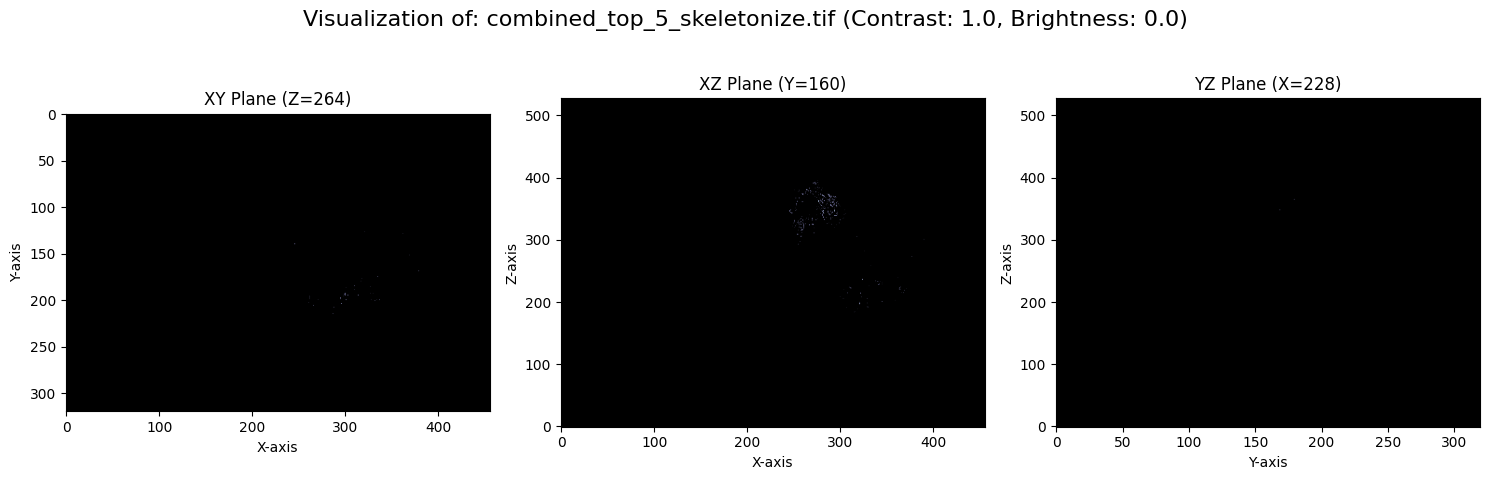

Successfully visualized 'f:\axonAtlas2\experiments\UTSW_brain5_reg_optim_2025-11-15_17-28-23\downsampled_standard_binned_tiffs\combined_top_5_skeletonize.tif'.


In [25]:
downsampled_standard_autof_skeleton = skeletonize2(downsampled_standard_autof, exp_path)
tiffVisualize(downsampled_standard_autof_skeleton, views=3, colormap="bone")


In [26]:
arrayStats(downsampled_standard_autof_skeleton)

  Shape: (528, 320, 456)
  Dtype: uint8
  Min: 0
  Max: 254
  Mean: 0.027255347990596757
  Std Dev: 1.6478251855624457
  Non-zero count: 31382
arr: [[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


# congrats! you finished part1 switch from the trailmmap_env conda enviorment to the BrainRender enviorment and then move over to the visualization notebook to turn these into 3D

In [27]:
print(exp_path)

f:\axonAtlas2\experiments\UTSW_brain5_reg_optim_2025-11-15_17-28-23
